<a href="https://colab.research.google.com/github/ichsanelf/Moekai-DeepLearningModel-CapstoneProject/blob/main/predict_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library
Tahap melakukan proses _import library_ yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (confusion_matrix,
                             classification_report,
                             silhouette_score,
                             mean_squared_error)

from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
import warnings

# Suppress specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Loading Dataset
Tahap mengunduh dataset dari [kaggle.com](https://www.kaggle.com/datasets/abcsds/pokemon)

In [ ]:
!kaggle datasets download -d abcsds/pokemon
!unzip pokemon.zip

Dataset URL: https://www.kaggle.com/datasets/abcsds/pokemon
License(s): CC0-1.0
  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 19.6MB/s]
Archive:  pokemon.zip
  inflating: Pokemon.csv             


Setelah mengunduh dataset dari kaggle, kemudian dilakukan pengecekkan untuk memastikan tidak ada duplikasi atau data yang hilang. Kemudian juga melihat informasi dan diskripsi dataset untuk memahami lebih lanjut tentang dataset yang digunakan.

In [ ]:
df = pd.read_csv('Pokemon.csv')

Melihat informasi dan dekripsi dari dataframe, seperti jenis, jumlah data yang ada, dan seterusnya.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Lalu menggunakan fungsi **sample(10)**, untuk melihat isi data dengan memilih 10 baris dari dataframe secara acak.

In [ ]:
df.sample(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
685,624,Pawniard,Dark,Steel,340,45,85,70,40,40,60,5,False
664,603,Eelektrik,Electric,NaN,405,65,85,70,75,70,40,5,False
60,55,Golduck,Water,NaN,500,80,82,78,95,80,85,1,False
666,605,Elgyem,Psychic,NaN,335,55,55,55,85,55,30,5,False
638,577,Solosis,Psychic,NaN,290,45,30,40,105,50,20,5,False
637,576,Gothitelle,Psychic,NaN,490,70,55,95,95,110,65,5,False
195,181,Ampharos,Electric,NaN,510,90,75,85,115,90,55,2,False
736,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False
86,80,Slowbro,Water,Psychic,490,95,75,110,100,80,30,1,False
140,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False


Menggunakan fungsi **duplicated()** untuk mengecek apakah ada duplikasi data.

In [ ]:
df.duplicated().sum()

0

Menggunakan fungsi **isnull()** untuk mengecek apakah ada nilai hilang.

In [ ]:
missing_val = df.isnull().sum()
missing_val[missing_val > 0]

,0
Type 2,386


Pada kolom Type 2, terdapat _missing value_ sebanyak 386. Hal ini dikarenakan terdapat pokemon yang tidak memiliki dua tipe(_Grass_, _Water_, _Fire_, dll). Namun karena ini adalah hal yang normal, untuk nilai kosong pada kolom Type 2 diganti dengan **None**. Kemudian dua kolom tersebut gabung untuk menyederhanakan dataset.

In [ ]:
df['Type 2'] = df['Type 2'].fillna('None')
df['Type Combination'] = df['Type 1'] + '-' + df['Type 2']
df.insert(4, 'Type Combination', df.pop('Type Combination'))
df.sample(3)

,#,Name,Type 1,Type 2,Type Combination,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
429,386,DeoxysAttack Forme,Psychic,None,Psychic-None,600,50,180,20,180,20,150,3,True
703,641,TornadusTherian Forme,Flying,None,Flying-None,580,79,100,80,110,90,121,5,True
696,635,Hydreigon,Dark,Dragon,Dark-Dragon,600,92,105,90,125,90,98,5,False


# EDA

Pada tahap ini, dilakukan visualisasi untuk melihat distribusi Pokemon.

## Distribusi Pokemon berdasarkan Generasi

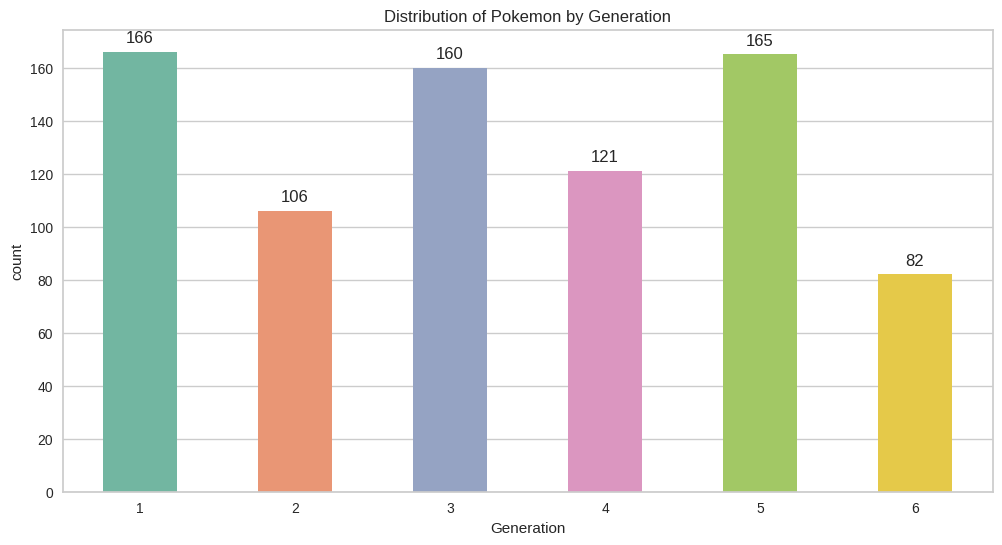

In [ ]:
plt.figure(figsize=(12, 6))

ax = sns.countplot(
                    x='Generation',
                    data=df,
                    hue='Generation',
                    palette='Set2',
                    width=0.6,
                    gap=0.2,
                    legend=False
                  )

for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Distribution of Pokemon by Generation')
plt.show()

Grafik ini menunjukkan jumlah pokemon berdasarkan generasinya. Didapatkan informasi bahwa generasi pertama, ketiga dan kelima memiliki populasi yang hampir sama, yaitu 166, 160, dan 165.

## Distribusi Pokemon Berdasarkan Tipe Pokemon

### Type 1(Primary Type)

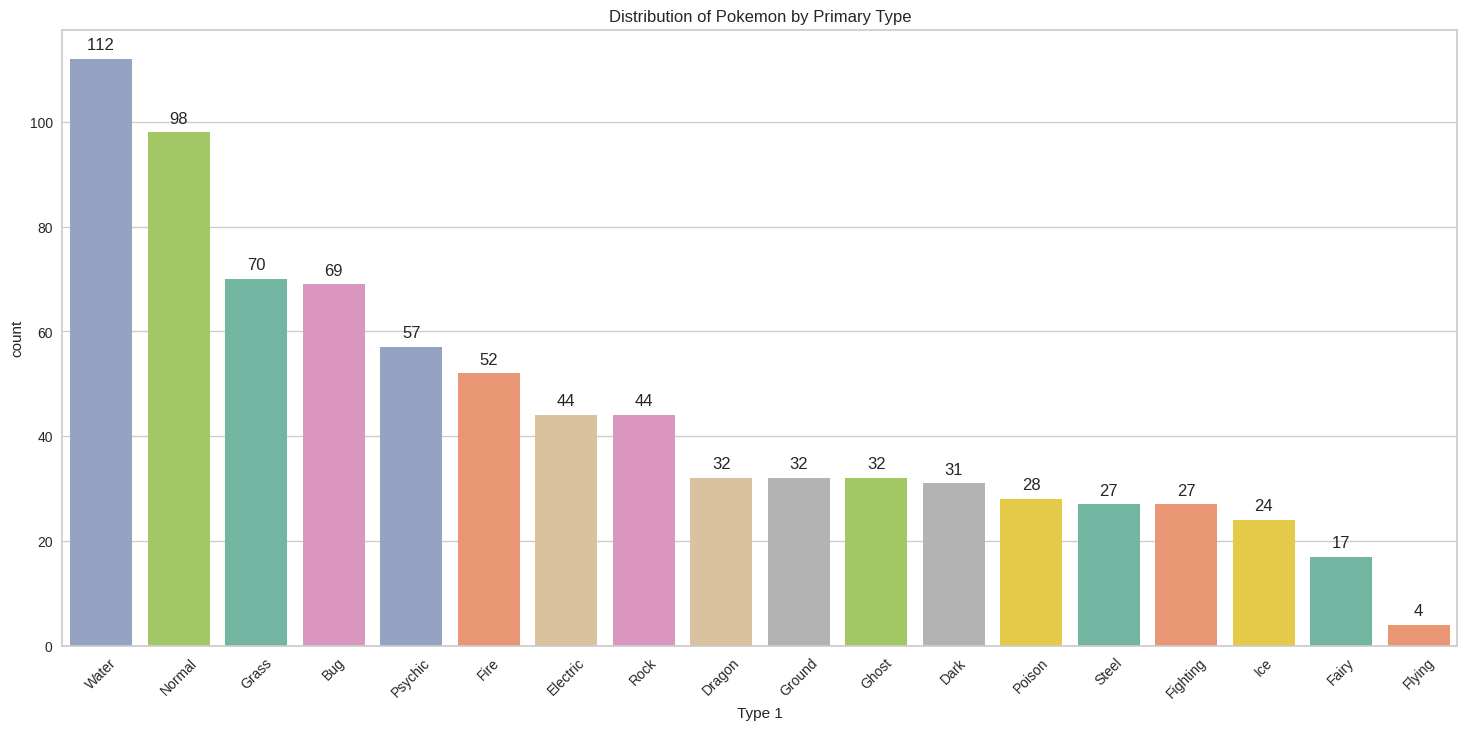

In [ ]:
plt.figure(figsize=(18, 8))

ax = sns.countplot(
              x='Type 1',
              data=df,
              hue='Type 1',
              palette='Set2',
              order=df['Type 1'].value_counts().index,
            )

for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Distribution of Pokemon by Primary Type')
plt.show()

Berdasarkan dari grafik diatas, bisa dilihat pokemon dengan tipe _Water_ mendominasi populasi pokemon berdasarkan tipe utama(_Primary Type_), diikuti oleh _Normal_ dan _Grass_. Sedangkan untuk tipe _Flying_ adalah minoritas.

### Type 2(Secondary Type)

Visualisasi untuk Type 2(_Secondary Type_) berbeda dari Type 1(_Primary Type_). Karena pada kolom Type terdapat nilai "None" yang mewakili informasi pokemon yang hanya memiliki satu _type_. Maka agar "None" tidak termasuk dalam grafik digunakan kode sebagai berikut:

```
df_filtered = df[df['Type 2'] != 'None']
```

untuk mengabaikan nilai "None"

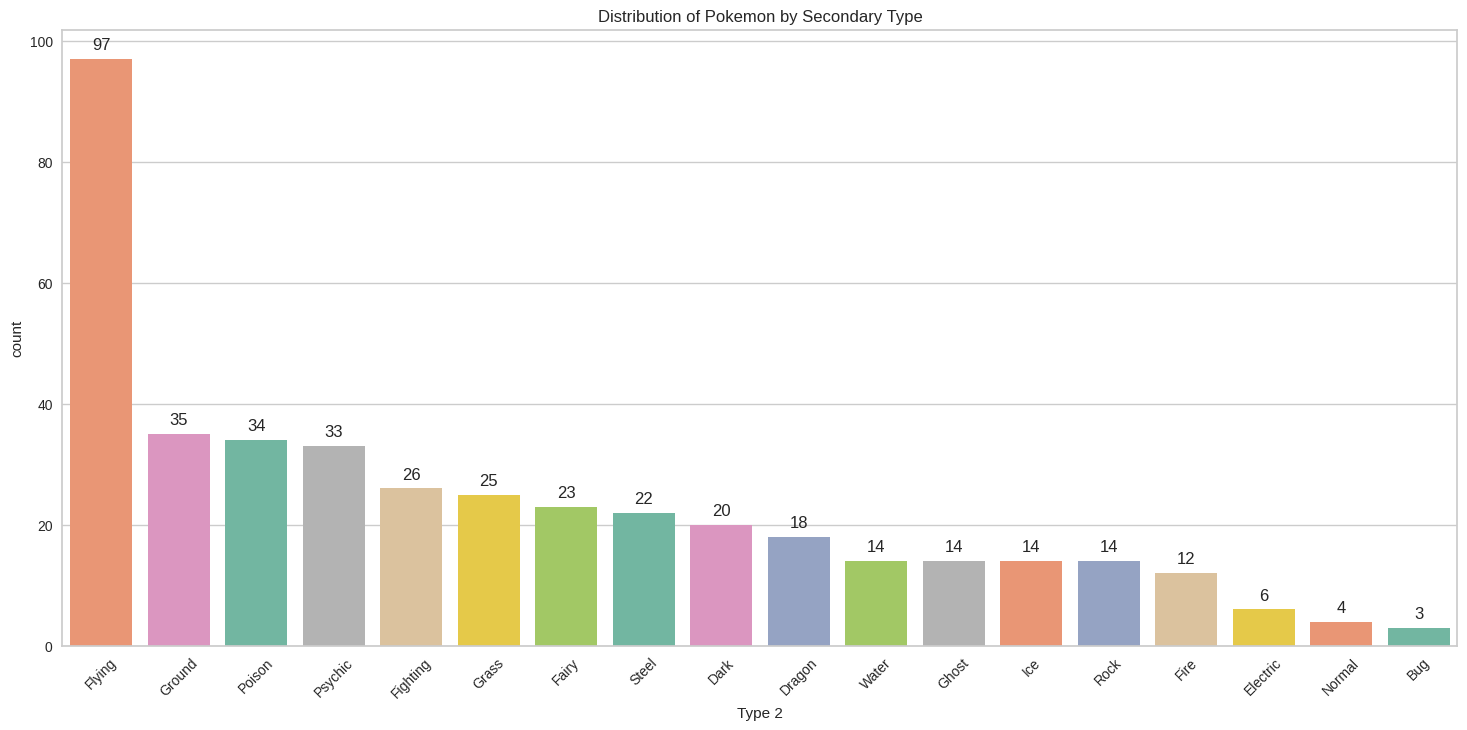

In [ ]:
df_filtered = df[df['Type 2'] != 'None']

plt.figure(figsize=(18, 8))

ax = sns.countplot(
              x='Type 2',
              data=df_filtered,
              hue='Type 2',
              palette='Set2',
              order=df_filtered['Type 2'].value_counts().index
            )

for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Distribution of Pokemon by Secondary Type')
plt.show()

Distribusi pokemon berdasarkan _secondary type_, didominasi oleh tipe _Flying_ bertolak belakang dari _primary type_ yang menjadi tipe minoritas.

## Distribusi Pokemon Berdasarkan Stat Pokemon

Sebelum membuat visualisi, saya melakukan proses _binning_ dari masing-masing _status_ pokemon. Dengan melakukan ini, kita dapat mengolongkan pokemon yang memiliki _status_ _weak_, _fair_, _strong_, dan _superior_ untuk setiap _status_ yang pokemon miliki.

In [ ]:
#Kolom yang akan di-binning
column = ['Total', 'HP', 'Attack', 'Defense',
          'Sp. Atk', 'Sp. Def', 'Speed']

#Kolom baru untuk menyimpan hasil binning
binning = ['Total Bin', 'HP Bin', 'Atk Bin', 'Def Bin',
           'SpAtk Bin', 'SpDef Bin', 'Spd Bin']

#Label hasil binning
label_stat = ['Weak','Fair', 'Strong', 'Superior']

for col_name, bin_name in zip(column,binning):
    df[bin_name] = pd.cut(df[col_name], bins=4, labels=label_stat, include_lowest=True)

Setelah melakukan proses _binning_ kemudian dibuatlah visualisasi dengan menggunakan **countplot()** dan melakukan iterasi untuk melihat distribusi data berdasarkan hasil _binning_

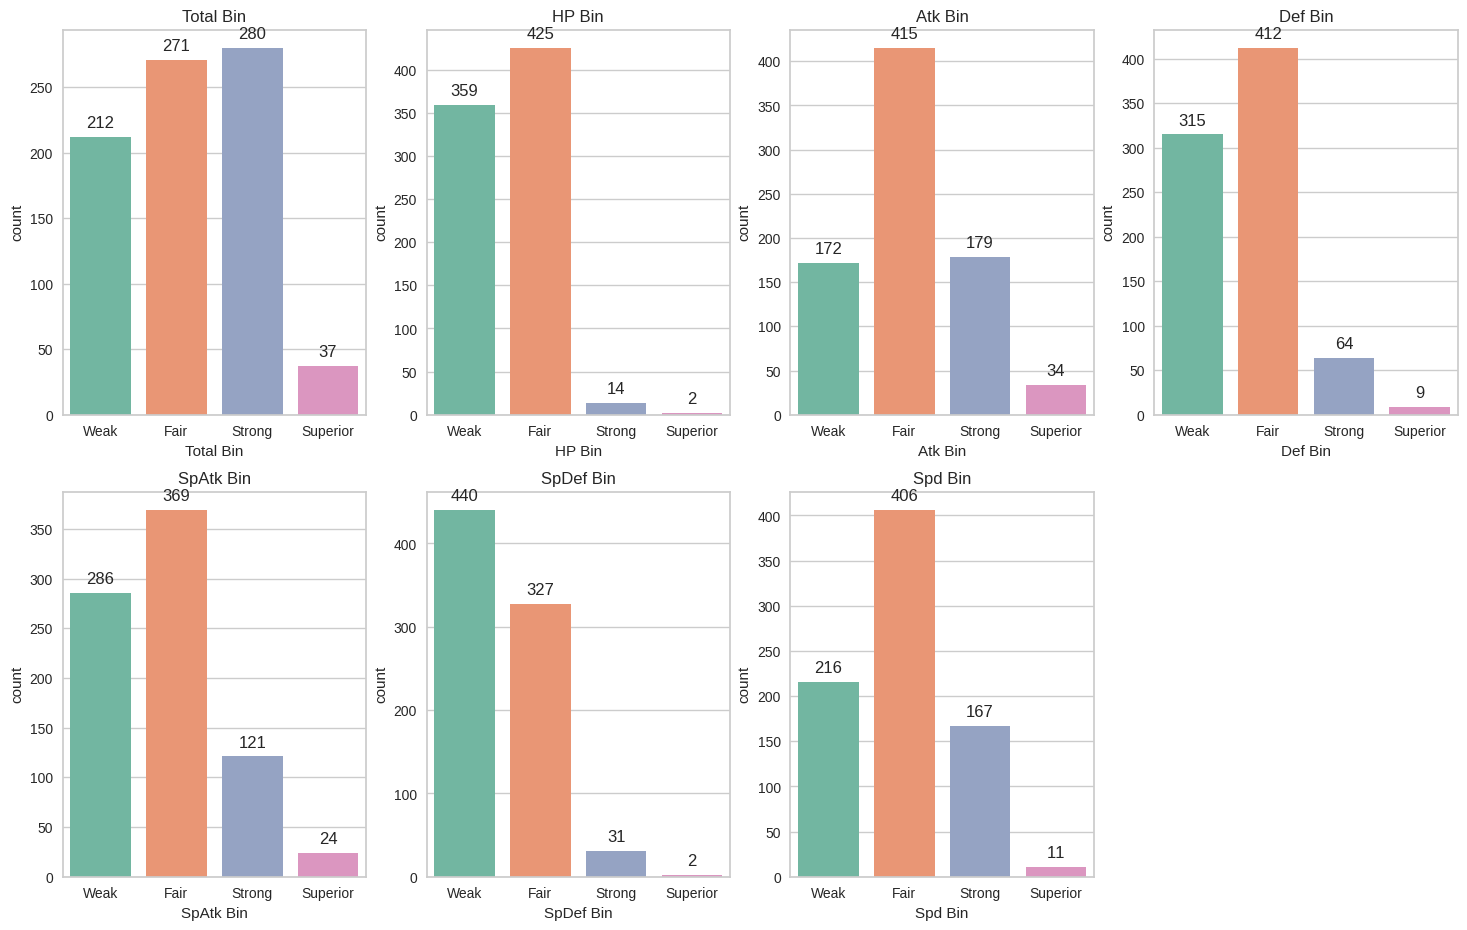

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 11))
axes = axes.flatten()

for i, col in enumerate(binning):
    sns.countplot(x=df[col], ax=axes[i], hue=df[col], palette='Set2')
    axes[i].set_title(col)

    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{int(height)}',
                      (p.get_x() + p.get_width() / 2., height),
                      ha='center',
                      va='center',
                      xytext=(0, 10),
                      textcoords='offset points')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.show()

## Distribusi Pokemon Berdasarkan Legendary

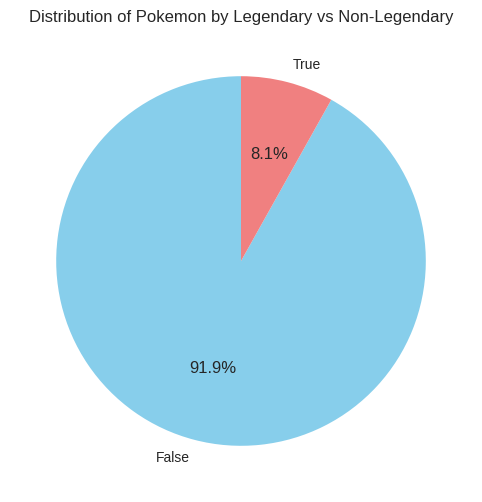

In [ ]:
legendary_counts = df['Legendary'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
        legendary_counts,
        labels=legendary_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'lightcoral']
        )

plt.title('Distribution of Pokemon by Legendary vs Non-Legendary')
plt.show()

Jumlah data pokemon legendaris dan non-legendaris sangat berbeda, yaitu 91,9% untuk non-legendaris dan 8.1% untuk legendaris. Untuk menghindari bias maka akan dilakukan metode SMOTE untuk menyeimbangkan data.

# Model Building

Membuat _heat map_ untuk melihat korelasi antara fitur-fitur yang akan digunakan dalam pelatihan model _clustering_ dan klasifikasi.

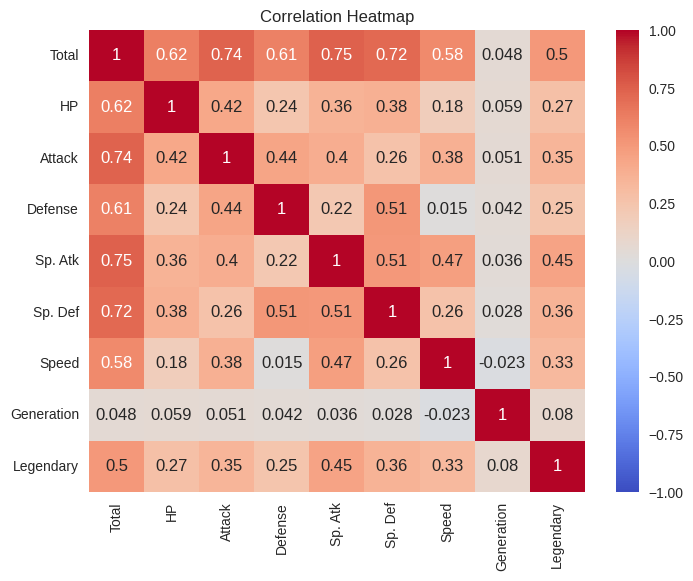

In [ ]:
df_number = df.select_dtypes(include=['number', 'bool'])
df_number = df_number.drop(['#'], axis=1)

corr_matrix = df_number.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Clustering

### Encoding

Pada tahap ini dilakukan encoding terhadap kolom hasil _binning_ sebelum melakukan _clustering_. Namun saya menyalin original dataframe ke dalam variabel **encoded_df** agar label yang terdapat pada kolom-kolom _binning_ dapat digunakan kembali.

In [ ]:
encoded_df = df.copy()

for col in binning:
  le = LabelEncoder()
  encoded_df[col] = le.fit_transform(encoded_df[col])

### Elbow Method

Menggunakan _Elbow Method_ untuk mencari nilai k terbaik. Lalu membuat variabel arr_idx untuk menyimpan fitur-fitur yang akan digunakan sebagai target _clustering_.

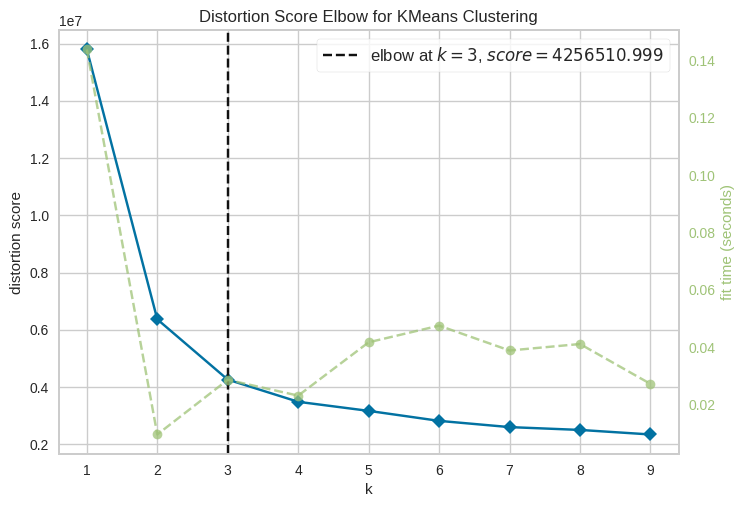

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
arr_idx = np.r_[5:12, 13, 14:21]
X = encoded_df.iloc[:, arr_idx].values

kmeans = KMeans(random_state=0)

visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

### Silhouette Score

Setelah mendapatkan nilai k terbaik, menggunakan fungis silhouette_score() untuk melihat kualitas _clustering_

In [ ]:
best_k = visualizer.elbow_value_

kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(X)

cluster_label = kmeans.labels_
silhouette_avg = silhouette_score(X, cluster_label)
print(f"The silhouette score for k={best_k}: {silhouette_avg:.6f}")

The silhouette score for k=3: 0.433195


### Visualiasi dengan grafik

Kemudian membuat scatter plot untuk menvisualisasikan hasil _clustering_.

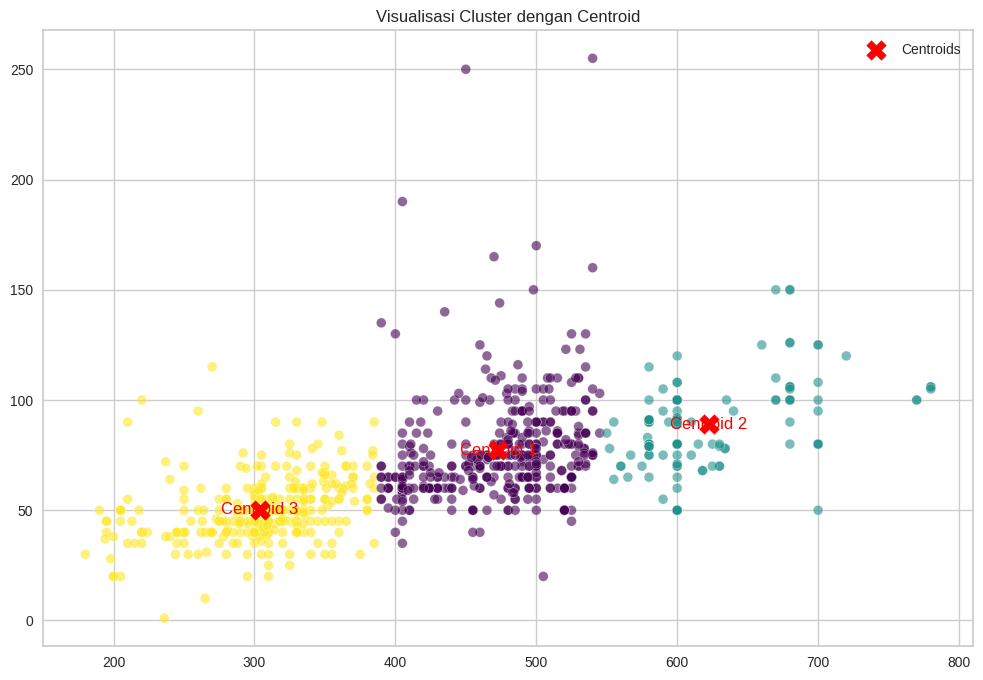

In [ ]:
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=cluster_label, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')

plt.legend()

plt.show()

Lalu menambahkan kolom Cluster ke dalam dataframe **df** dan **encoded_df**, dan menggunakan fungsi **sample()** untuk melihat sampel dataframe.

In [ ]:
df['Cluster'] = cluster_label
encoded_df['Cluster'] = cluster_label

df.sample(5)

,#,Name,Type 1,Type 2,Type Combination,Total,HP,Attack,Defense,Sp. Atk,...,Generation,Legendary,Total Bin,HP Bin,Atk Bin,Def Bin,SpAtk Bin,SpDef Bin,Spd Bin,Cluster
156,144,Articuno,Ice,Flying,Ice-Flying,580,90,85,100,95,...,1,True,Strong,Fair,Fair,Fair,Fair,Fair,Fair,1
80,74,Geodude,Rock,Ground,Rock-Ground,300,40,80,100,30,...,1,False,Weak,Weak,Fair,Fair,Weak,Weak,Weak,2
733,665,Spewpa,Bug,None,Bug-None,213,45,22,60,27,...,6,False,Weak,Weak,Weak,Weak,Weak,Weak,Weak,2
351,321,Wailord,Water,None,Water-None,500,170,90,45,90,...,3,False,Strong,Strong,Fair,Weak,Fair,Weak,Fair,0
115,107,Hitmonchan,Fighting,None,Fighting-None,455,50,105,79,35,...,1,False,Fair,Weak,Strong,Fair,Weak,Fair,Fair,0


Membuat grafik barplot untuk melihat lebih detil hasil _clustering_. Dengan membuat barplot kita pada mengetahui bagaimana pokemon dikelompokkan melalui proses _clustering_. Barplot ini dibuat berdasarkan **Cluster** dan **Total Bin**.   

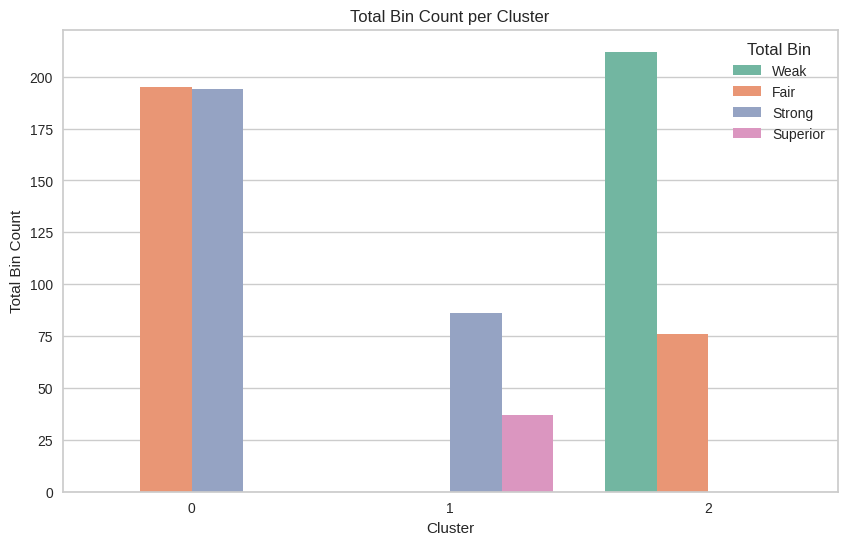

In [ ]:
cluster_bin_counts = df.groupby(['Cluster', 'Total Bin'])['Total Bin'].count().reset_index(name='Count')

plt.figure(figsize=(10, 6))

sns.barplot(x='Cluster', y='Count', hue='Total Bin', data=cluster_bin_counts, palette='Set2')

plt.title('Total Bin Count per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Bin Count')
plt.show()

Melalui grafik diatas didapatkan informasi sebagai berikut:
* Terdapat banyak pokemon dengan status **Fair** dan **Strong** pada cluster pertama.
* Terdapat banyak pokemon dengan status **Strong** dan **Superior** pada cluster kedua.
* Terdapat banyak pokemon dengan status **Weak** dan **Fair** pada cluster ketiga.

Berdasarkan informasi diatas, dapat disimpulkan pada cluster kedua adalah kelompok pokemon terkuat dan cluster ketiga adalah kelompok pokemon terlemah.

## Klasifikasi

### Encoding

Melakukkan encoding untuk kolom **Type Combination**

In [ ]:
encoded_df = pd.get_dummies(encoded_df, columns=['Type Combination'])

### Data Splitting

Pada tahap ini dilakukan pembagian data pelatihan. Pertama menghapus kolom-kolom yang tidak diperlukan dalam pelatihan model dan juga memilih kolom sebagai target pelatihan, yaitu kolom Legendary. Lalu juga melakukan standarisasi data pelatihan.

In [ ]:
X = encoded_df.drop(['Legendary', 'Name', '#', 'Type 1', 'Type 2'], axis=1)
y = encoded_df['Legendary']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(640, 170), y_train=(640,)
Test set shape: X_test=(160, 170), y_test=(160,)


Untuk menyeimbangkan data, perlu dilakukan metode **SMOTE** dengan melakukan _oversampling_ terhadap data minoritas. Dengan melihat dari _pie chart_ distrubusi pokemon legendaris, saya menggunakan SMOTE dengan **sampling_strategy=1.0** untuk menambahkan data legendaris agar sesuai dengan non-legendaris.

In [ ]:
print(Counter(y_train))

Counter({False: 588, True: 52})


In [ ]:
sm = SMOTE(random_state=42, sampling_strategy=1.0)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
print(Counter(y_train_resampled))

Counter({False: 588, True: 588})


### Logistic Regression Model

Model algoritma yang digunakan adalah **Logistic Regression**. Kemudian menggunakan **classisfication_report()** mendapatkan hasil evaluasi dari pelatihan model.

In [ ]:
lr = LogisticRegression(random_state=0)

lr.fit(X_train_resampled, y_train_resampled)

y_pred = lr.predict(X_test)

print("Classification Report\n",
    "-----------------------------------------------------\n",
      classification_report(y_test, y_pred))

Classification Report
 -----------------------------------------------------
               precision    recall  f1-score   support

       False       0.97      0.95      0.96       147
        True       0.53      0.69      0.60        13

    accuracy                           0.93       160
   macro avg       0.75      0.82      0.78       160
weighted avg       0.94      0.93      0.93       160



Hasil evaluasi menunjukkan hasil pelatihan yang baik dengan akurasi sebesar 93%. Kemudian membuat _confusion matrix_ untuk melihat hasil kerja prediksi model.

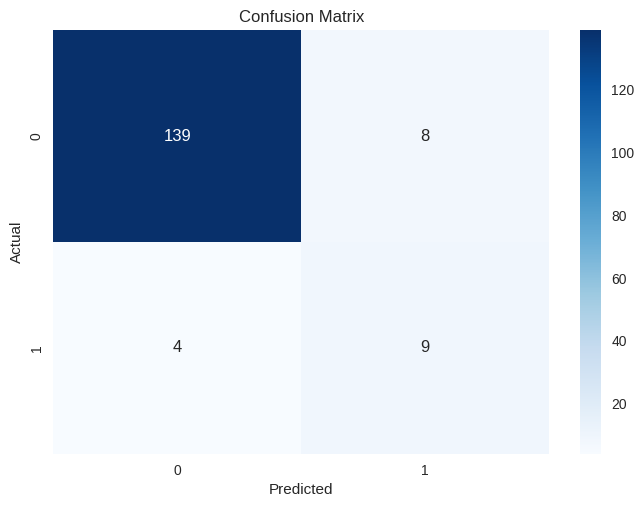

In [ ]:
y_pred = lr.predict(X_test)
lr_cm = confusion_matrix(y_test, y_pred)

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Dari _confusion matrix_ diatas, 148 pokemon diprediksi dengan benar, yaitu 139 sebagai _True Negative_(non-legendaris) dan 9 sebagai _True Positive_(legendaris). Dan yang tidak terprediksi dengan benar ada 12 pokemon, yaitu 4 sebagai _False Positive_ dan 8 sebagai _False Negative_. Lalu menggunakan _Mean Squared Error_ untuk melakukan evaluasi terakhir dengan melihat tingkat error dari model dalam melakukan prediksi.

In [ ]:
y_train_pred_dt = lr.predict(X_train_resampled)
y_test_pred_dt = lr.predict(X_test)

train_mse_dt = mean_squared_error(y_train_resampled, y_train_pred_dt)
test_mse_dt = mean_squared_error(y_test, y_test_pred_dt)

print(f"Logistic Regression Training MSE: {train_mse_dt}")
print(f"Logistic Regression Test MSE: {test_mse_dt}")

Logistic Regression Training MSE: 0.004251700680272109
Logistic Regression Test MSE: 0.075
